<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/ml_1401/blob/main/q2ml1401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

علیرضا خالقی آناقیزی 
99101462

سوال 2

در قسمت زیر فایل های مورد نظر را در گوگل درایو ذخیره کردیم و سپسفایل های مورد نظر را لود کرده و دیتا های 
موجود را به ترتیب در ماتریس های 

SVT 

ذخیره کردیم.

In [2]:
import csv 
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
filename1='/content/drive/MyDrive/ml/test_data.npy' 
filename2='/content/drive/MyDrive/ml/train_data.npy' 
filename3='/content/drive/MyDrive/ml/validation_data.npy' 


Mounted at /content/drive


In [3]:
T = np.load(filename1, mmap_mode='r')
S = np.load(filename2, mmap_mode='r')
V = np.load(filename3, mmap_mode='r')
#print(T)
print(str(len(T))+'\n')
#print(S)
print(str(len(S))+'\n')
#print(V)
print(str(len(V))+'\n')

40

30

40



حال با توجه به این که در حالت کلی میخواهیم یک ترکیب غیر خطی برای هر یک از متغییر ها بر اساس ورودی هایش بچینیم باید در رابطه ماتریسی موجود برای رگرسیون خطی ما یک 

ψn(X)=[ψ1n(x),ψ2n(x), ...]  =>  
ψ1n(x)=[x1,..,x1ⁿ]ᵀ  

In [4]:
def spiFunctionN(n,dataset) :
  tra= np.array(dataset).T
  xi=tra[0]
  xi=np.array(xi,dtype=float)
  spi=[]
  for i in xi:
    xin=[]
    for j in range(n):
      xin.append(pow(i,j))
    xin=np.array(xin).T
    xin=np.array(xin,dtype=float)  
    spi.append(xin)
  spi=np.array(spi).T
  spi=np.array(spi,dtype=float) 
  return spi


در بالا تابعی نوشتیم که با گرفتن عدد n  ماتریس سای مورد نظر را در خروجی میدهی.

داده های مساله را داخل یک لیست قرار میدهیم تا با استفاده از رابطه ماتریسی ضرایب مورد نظر را به دست آوریم

A=ψ*ψT
B=ψ*y
w*=invers(A)*B

In [5]:
tra= np.array(S).T
yS=tra[1]
yS=np.array(yS,dtype=float)

def WofN(y,x):
  xt=np.array(x).T
  xt=np.array(xt,dtype=float)
  A=np.dot(x,xt)
  B=np.dot(x,y)
  w=np.dot(np.linalg.inv(A),B)
  print("w"+str(len(x)))
  print(w)
  return(w)

def calLsn(w,y,x):
  M=(len(x[0]))
  h=np.dot(w,x)
  sum=0
  max=0
  for i in range(M):
    sum=sum+pow((h[i]-y[i]),2)
    if(pow((h[i]-y[i]),2)>max):
      max=pow((h[i]-y[i]),2)
  L=sum/M 
  print("L"+str(len(x)))
  print(L) 
  print("max"+str(len(x)))
  print(max)
  return (L)
 

در باالا توابع مورد نظر برای محاسبه ضرایب و سپس با استفاده از ضرایب مقدار خطای محاسبه شده برای هر کدام از  درجه های مورد نظر به دست می آوریم

In [6]:
Ln=[]
for i in range(15):
  spi=spiFunctionN(i+1,S)
  w=WofN(yS,spi)
  li=calLsn(w,yS,spi)
  Ln.append(li)
print(Ln)  


w1
[0.29137662]
L1
0.7979479867850431
max1
7.733590754728554
w2
[ 0.3028272  -0.17115968]
L2
0.7618038655184619
max2
9.46172686931678
w3
[-0.47153391  0.02303306  0.61487693]
L3
0.25136046057337025
max3
2.3432089080028113
w4
[-0.44772657 -0.21431613  0.63302358  0.09907814]
L4
0.2405669239187683
max4
1.7025126525945165
w5
[-0.13999917 -0.28076096 -0.30608827  0.17859025  0.29402467]
L5
0.14807869905653698
max5
0.660694906977806
w6
[-0.14467118  0.28887691 -0.48285907 -0.52448461  0.37396026  0.17091315]
L6
0.12273473144420241
max6
0.8059519880494683
w7
[-0.32165221  0.21470849  0.79148165 -0.65529921 -0.67297717  0.23686129
  0.20954853]
L7
0.08872308853571916
max7
0.43934321926410524
w8
[-0.32123719  0.20067219  0.79125773 -0.61887301 -0.67492274  0.21489276
  0.21033192  0.00370995]
L8
0.08871246906527389
max8
0.4434734590429635
w9
[-0.57681491  0.45232021  3.65340331 -1.78466323 -4.91506455  1.06287354
  2.19631879 -0.15970799 -0.29020886]
L9
0.044821130927609615
max9
0.233563688205

رسم نمودار

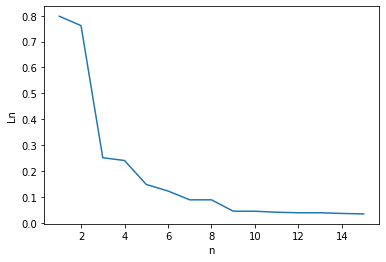

In [14]:
import matplotlib.pyplot as plt
xaxis=[]
for i in range(15):
  xaxis.append(i+1)
xpoints = np.array(xaxis)
ypoints = np.array(Ln)
plt.xlabel("n")
plt.ylabel("Ln")
plt.plot(xpoints, ypoints)
plt.show()